In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df_timeseries = pd.read_csv('data/df_timeseries.csv')
df_interventions = pd.read_csv('data/interventions.csv')

In [3]:
display(df_timeseries)

,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593665,15144565.0,6.290878,de.m,2020-07-27,ALL,1.000000,NaN,35,67,66,65,83,40
1593666,14183699.0,5.891745,de.m,2020-07-28,ALL,1.000000,NaN,35,67,66,65,83,40
1593667,13986935.0,5.810012,de.m,2020-07-29,ALL,1.000000,NaN,35,67,66,65,83,40
1593668,13483274.0,5.600797,de.m,2020-07-30,ALL,1.000000,NaN,35,67,66,65,83,40


In [4]:
filtered_df_ja = df_timeseries[df_timeseries['language'].str.contains('ja', case=False, na=False)]
display(filtered_df_ja)

,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858125,24801067.0,20.705723,ja.m,2020-07-27,ALL,1.000000,NaN,54,46,95,92,88,42
858126,23559955.0,19.669553,ja.m,2020-07-28,ALL,1.000000,NaN,54,46,95,92,88,42
858127,23674563.0,19.765236,ja.m,2020-07-29,ALL,1.000000,NaN,54,46,95,92,88,42
858128,22409433.0,18.709014,ja.m,2020-07-30,ALL,1.000000,NaN,54,46,95,92,88,42


In [5]:
display(df_interventions)


,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaN,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaN,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaN,NaN,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaN


In [6]:
print(df_interventions.iloc[11,3])

2020-02-27


In [7]:
filtered_df_ja['date'] = pd.to_datetime(filtered_df_ja['date'])
school_closure_ja = pd.to_datetime(df_interventions.iloc[11,3])

df_ja_before_covid = filtered_df_ja[filtered_df_ja['date'] < school_closure_ja]
df_ja_after_covid = filtered_df_ja[filtered_df_ja['date'] >= school_closure_ja]

display(df_ja_before_covid)
#df_interventions.iloc[11,3]

/var/folders/2r/gl8y1b7x0p93l0ml1_7f2_tc0000gr/T/ipykernel_12218/1970238317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ja['date'] = pd.to_datetime(filtered_df_ja['date'])


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857969,23148078.0,19.325689,ja.m,2020-02-22,ALL,1.000000,NaN,54,46,95,92,88,42
857970,25414258.0,21.217660,ja.m,2020-02-23,ALL,1.000000,NaN,54,46,95,92,88,42
857971,26376008.0,22.020598,ja.m,2020-02-24,ALL,1.000000,NaN,54,46,95,92,88,42
857972,21468022.0,17.923057,ja.m,2020-02-25,ALL,1.000000,NaN,54,46,95,92,88,42


In [8]:

# sum up the number of pageviews over the whole period for each topic
df_timeseries_ = df_timeseries[df_timeseries.topic != 'ALL'].groupby(["language", "topic"])["pageviews_per_page"].sum().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries_ = df_timeseries_.pivot(index='language', columns='topic', values='pageviews_per_page').reset_index()

df_timeseries_['total_pageviews'] = df_timeseries_.drop('language', axis=1).sum(axis=1)

display(df_timeseries_) 


topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,774.808922,881.729281,1134.707962,879.019264,1346.115658,1185.342757,1575.391709,799.741952,302.367934,...,863.337320,783.232084,1194.099622,955.351823,1466.006086,1458.254893,748.141084,492.842323,1252.625077,4.697771e+04
1,ca.m,407.506271,589.289498,1367.832172,375.247545,752.562947,693.074820,831.487634,710.765507,460.372950,...,449.919845,414.227553,368.623244,445.529812,1128.168746,720.194057,438.508377,255.910570,456.497708,2.894484e+04
2,da,1104.038578,1631.526754,2604.245426,1974.827188,2917.094551,2632.031436,2554.575092,1348.207692,1423.992046,...,2784.668101,1651.887497,1813.894879,4463.157277,3436.191356,4535.779817,2558.568198,1309.758133,2663.286436,1.179873e+05
3,da.m,2266.904972,3664.427632,5246.081214,1548.121724,2391.387166,3205.192106,3269.276190,3012.394872,3336.619853,...,2208.222276,2154.336675,780.452830,2146.618545,4132.126677,2071.941716,2410.497441,1306.413859,1970.636845,1.427282e+05
4,de,5775.258675,8046.654382,21926.591758,21272.383909,10832.270386,11604.012958,12589.219412,19416.254954,13148.845537,...,8404.118589,17248.905689,8762.325459,24256.676747,27290.381476,20371.427510,16212.255959,5886.505210,26327.732271,7.352165e+05
5,de.m,9485.273658,15756.219052,43954.000606,20841.126162,10566.442887,17018.109682,17838.895243,37094.279172,23433.377787,...,8242.170865,18221.157798,4750.493438,12446.139775,40984.370532,13545.722973,16004.058681,6095.861850,17898.039865,8.846088e+05
6,fi,1000.936264,1092.634723,3863.590133,1904.861026,2335.287303,1833.259360,1854.781405,1790.008601,1466.953064,...,2499.969862,2062.064894,1676.067368,3990.189601,4438.695380,4541.106722,2491.387874,1215.661782,3255.950982,1.138512e+05
7,fi.m,2262.881084,3013.527546,8944.766287,2287.841301,3136.952603,3490.240012,3368.280735,4639.391454,3944.242220,...,3417.939205,3386.197546,1172.292632,2774.209524,9725.799512,4521.985789,3953.989523,1888.826923,3392.275815,1.856965e+05
8,fr,4857.185069,6402.120230,11949.053212,8616.847829,7726.271128,10092.885698,9161.573007,10016.096885,7938.562822,...,6760.513507,7904.934064,6301.405746,13082.077024,16770.176499,14398.755656,8185.425847,3920.837431,16009.499609,4.614163e+05
9,fr.m,9328.392607,14070.531539,27295.282762,8212.016142,9641.941872,14915.143747,12828.305778,18480.696668,12547.224966,...,7872.597556,10273.749964,4391.089763,10024.399310,31071.465123,13663.847894,9898.379661,4590.377314,12144.734146,6.535353e+05


In [9]:
# Get the unique languages from the interventions dataframe
languages = df_interventions['lang'].unique()

# Create an empty dictionary to store the cropped timeseries data for each language
cropped_timeseries = {}

# Iterate over each language
for language in languages:
    if language != 'en':
        # Get the school closure date for the current language
        closure_date = df_interventions.loc[df_interventions['lang'] == language, 'School closure'].values[0]
        
        # Crop the timeseries data for the current language based on the closure date
        cropped_data = df_timeseries.loc[(df_timeseries['language'].str.contains(language, case=False, na=False)) & (df_timeseries['date'] < closure_date)]
        
        # Store the cropped data in the dictionary
        cropped_timeseries[language] = cropped_data

# Print the cropped timeseries data for each language
for language, data in cropped_timeseries.items():
    print(f"Cropped timeseries data for {language}:")
    display(data)

Cropped timeseries data for fr:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
674245,1729885.0,4.521618,fr,2018-01-01,Culture.Biography.Biography*,0.268574,0.240677,68,71,43,86,63,48
674246,2236188.0,5.845005,fr,2018-01-02,Culture.Biography.Biography*,0.246295,0.240510,68,71,43,86,63,48
674247,2355936.0,6.158006,fr,2018-01-03,Culture.Biography.Biography*,0.241723,0.240344,68,71,43,86,63,48
674248,2410102.0,6.299586,fr,2018-01-04,Culture.Biography.Biography*,0.240181,0.240181,68,71,43,86,63,48
674249,2282237.0,5.965369,fr,2018-01-05,Culture.Biography.Biography*,0.239949,0.240019,68,71,43,86,63,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532230,12969210.0,5.924808,fr.m,2020-03-09,ALL,1.000000,NaN,68,71,43,86,63,48
1532231,12521482.0,5.720270,fr.m,2020-03-10,ALL,1.000000,NaN,68,71,43,86,63,48
1532232,12498105.0,5.709590,fr.m,2020-03-11,ALL,1.000000,NaN,68,71,43,86,63,48
1532233,11486075.0,5.247258,fr.m,2020-03-12,ALL,1.000000,NaN,68,71,43,86,63,48


Cropped timeseries data for da:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
367770,46472.0,0.796804,da,2018-01-01,Culture.Biography.Biography*,0.225031,0.196654,18,74,16,23,35,70
367771,62286.0,1.067949,da,2018-01-02,Culture.Biography.Biography*,0.193027,0.196706,18,74,16,23,35,70
367772,72865.0,1.249336,da,2018-01-03,Culture.Biography.Biography*,0.183652,0.196756,18,74,16,23,35,70
367773,82582.0,1.415942,da,2018-01-04,Culture.Biography.Biography*,0.184770,0.196806,18,74,16,23,35,70
367774,76965.0,1.319634,da,2018-01-05,Culture.Biography.Biography*,0.190221,0.196855,18,74,16,23,35,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225754,541737.0,2.112439,da.m,2020-03-08,ALL,1.000000,NaN,18,74,16,23,35,70
1225755,430637.0,1.679217,da.m,2020-03-09,ALL,1.000000,NaN,18,74,16,23,35,70
1225756,361549.0,1.409817,da.m,2020-03-10,ALL,1.000000,NaN,18,74,16,23,35,70
1225757,348183.0,1.357698,da.m,2020-03-11,ALL,1.000000,NaN,18,74,16,23,35,70


Cropped timeseries data for de:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
735540,2205007.0,6.013306,de,2018-01-01,Culture.Biography.Biography*,0.237419,0.190706,35,67,66,65,83,40
735541,2925728.0,7.978794,de,2018-01-02,Culture.Biography.Biography*,0.202132,0.190692,35,67,66,65,83,40
735542,3098499.0,8.449960,de,2018-01-03,Culture.Biography.Biography*,0.196626,0.190679,35,67,66,65,83,40
735543,2800005.0,7.635933,de,2018-01-04,Culture.Biography.Biography*,0.185805,0.190668,35,67,66,65,83,40
735544,2682927.0,7.316648,de,2018-01-05,Culture.Biography.Biography*,0.191677,0.190657,35,67,66,65,83,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593525,14447825.0,6.001460,de.m,2020-03-09,ALL,1.000000,NaN,35,67,66,65,83,40
1593526,15370201.0,6.384604,de.m,2020-03-10,ALL,1.000000,NaN,35,67,66,65,83,40
1593527,13856074.0,5.755654,de.m,2020-03-11,ALL,1.000000,NaN,35,67,66,65,83,40
1593528,12778709.0,5.308129,de.m,2020-03-12,ALL,1.000000,NaN,35,67,66,65,83,40


Cropped timeseries data for it:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
490360,809879.0,2.752079,it,2018-01-01,Culture.Biography.Biography*,0.242570,0.233726,50,76,70,75,61,30
490361,1250361.0,4.248896,it,2018-01-02,Culture.Biography.Biography*,0.230336,0.233466,50,76,70,75,61,30
490362,1295280.0,4.401537,it,2018-01-03,Culture.Biography.Biography*,0.229627,0.233205,50,76,70,75,61,30
490363,1311621.0,4.457066,it,2018-01-04,Culture.Biography.Biography*,0.226342,0.232945,50,76,70,75,61,30
490364,1303927.0,4.430921,it,2018-01-05,Culture.Biography.Biography*,0.238144,0.232685,50,76,70,75,61,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348336,11887695.0,7.484484,it.m,2020-02-29,ALL,1.000000,NaN,50,76,70,75,61,30
1348337,14388352.0,9.058895,it.m,2020-03-01,ALL,1.000000,NaN,50,76,70,75,61,30
1348338,11908343.0,7.497483,it.m,2020-03-02,ALL,1.000000,NaN,50,76,70,75,61,30
1348339,11711415.0,7.373498,it.m,2020-03-03,ALL,1.000000,NaN,50,76,70,75,61,30


Cropped timeseries data for nl:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
612950,268126.0,1.753122,nl,2018-01-01,Culture.Biography.Biography*,0.223554,0.185229,38,80,14,53,67,68
612951,366294.0,2.394986,nl,2018-01-02,Culture.Biography.Biography*,0.190110,0.185230,38,80,14,53,67,68
612952,368693.0,2.410672,nl,2018-01-03,Culture.Biography.Biography*,0.180587,0.185231,38,80,14,53,67,68
612953,365701.0,2.391109,nl,2018-01-04,Culture.Biography.Biography*,0.180552,0.185233,38,80,14,53,67,68
612954,368060.0,2.406533,nl,2018-01-05,Culture.Biography.Biography*,0.191853,0.185234,38,80,14,53,67,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470932,2402921.0,1.481841,nl.m,2020-03-06,ALL,1.000000,NaN,38,80,14,53,67,68
1470933,2747213.0,1.694160,nl.m,2020-03-07,ALL,1.000000,NaN,38,80,14,53,67,68
1470934,3239333.0,1.997642,nl.m,2020-03-08,ALL,1.000000,NaN,38,80,14,53,67,68
1470935,2382074.0,1.468985,nl.m,2020-03-09,ALL,1.000000,NaN,38,80,14,53,67,68


Cropped timeseries data for no:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
245180,50478.0,0.427606,no,2018-01-01,Culture.Biography.Biography*,0.224929,0.216246,31,69,8,50,35,55
245181,78712.0,0.666780,no,2018-01-02,Culture.Biography.Biography*,0.210027,0.216240,31,69,8,50,35,55
245182,96716.0,0.819294,no,2018-01-03,Culture.Biography.Biography*,0.210370,0.216233,31,69,8,50,35,55
245183,96902.0,0.820869,no,2018-01-04,Culture.Biography.Biography*,0.201880,0.216226,31,69,8,50,35,55
245184,95794.0,0.811483,no,2018-01-05,Culture.Biography.Biography*,0.215334,0.216218,31,69,8,50,35,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103164,691731.0,1.338390,no.m,2020-03-08,ALL,1.000000,NaN,31,69,8,50,35,55
1103165,498389.0,0.964304,no.m,2020-03-09,ALL,1.000000,NaN,31,69,8,50,35,55
1103166,490599.0,0.949232,no.m,2020-03-10,ALL,1.000000,NaN,31,69,8,50,35,55
1103167,563836.0,1.090934,no.m,2020-03-11,ALL,1.000000,NaN,31,69,8,50,35,55


Cropped timeseries data for sr:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
429065,55828.0,1.480142,sr,2018-01-01,Culture.Biography.Biography*,0.290153,0.241807,86,25,43,92,52,28
429066,65711.0,1.742166,sr,2018-01-02,Culture.Biography.Biography*,0.259059,0.241694,86,25,43,92,52,28
429067,68835.0,1.824991,sr,2018-01-03,Culture.Biography.Biography*,0.252811,0.241582,86,25,43,92,52,28
429068,66083.0,1.752028,sr,2018-01-04,Culture.Biography.Biography*,0.241444,0.241471,86,25,43,92,52,28
429069,62189.0,1.648788,sr,2018-01-05,Culture.Biography.Biography*,0.241756,0.241361,86,25,43,92,52,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287051,643078.0,1.623676,sr.m,2020-03-10,ALL,1.000000,NaN,86,25,43,92,52,28
1287052,596686.0,1.506543,sr.m,2020-03-11,ALL,1.000000,NaN,86,25,43,92,52,28
1287053,525652.0,1.327193,sr.m,2020-03-12,ALL,1.000000,NaN,86,25,43,92,52,28
1287054,507895.0,1.282359,sr.m,2020-03-13,ALL,1.000000,NaN,86,25,43,92,52,28


Cropped timeseries data for sv:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
183885,NaN,NaN,sv,2018-01-01,Culture.Biography.Biography*,NaN,NaN,31,71,5,29,53,78
183886,NaN,NaN,sv,2018-01-02,Culture.Biography.Biography*,NaN,NaN,31,71,5,29,53,78
183887,NaN,NaN,sv,2018-01-03,Culture.Biography.Biography*,NaN,NaN,31,71,5,29,53,78
183888,NaN,NaN,sv,2018-01-04,Culture.Biography.Biography*,NaN,NaN,31,71,5,29,53,78
183889,NaN,NaN,sv,2018-01-05,Culture.Biography.Biography*,NaN,NaN,31,71,5,29,53,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041874,1603248.0,0.818215,sv.m,2020-03-13,ALL,1.0,NaN,31,71,5,29,53,78
1041875,1932839.0,0.986421,sv.m,2020-03-14,ALL,1.0,NaN,31,71,5,29,53,78
1041876,2041071.0,1.041657,sv.m,2020-03-15,ALL,1.0,NaN,31,71,5,29,53,78
1041877,1495549.0,0.763251,sv.m,2020-03-16,ALL,1.0,NaN,31,71,5,29,53,78


Cropped timeseries data for ko:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
61295,145060.0,1.921375,ko,2018-01-01,Culture.Biography.Biography*,0.177081,0.174487,60,18,39,85,100,29
61296,173926.0,2.303717,ko,2018-01-02,Culture.Biography.Biography*,0.181317,0.174654,60,18,39,85,100,29
61297,169159.0,2.240576,ko,2018-01-03,Culture.Biography.Biography*,0.163015,0.174819,60,18,39,85,100,29
61298,156540.0,2.073432,ko,2018-01-04,Culture.Biography.Biography*,0.163633,0.174983,60,18,39,85,100,29
61299,152631.0,2.021656,ko,2018-01-05,Culture.Biography.Biography*,0.159663,0.175145,60,18,39,85,100,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919260,1397409.0,2.856630,ko.m,2020-02-18,ALL,1.000000,NaN,60,18,39,85,100,29
919261,1400746.0,2.863451,ko.m,2020-02-19,ALL,1.000000,NaN,60,18,39,85,100,29
919262,1373115.0,2.806967,ko.m,2020-02-20,ALL,1.000000,NaN,60,18,39,85,100,29
919263,1413738.0,2.890010,ko.m,2020-02-21,ALL,1.000000,NaN,60,18,39,85,100,29


Cropped timeseries data for ca:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
551655,19369.0,0.190351,ca,2018-01-01,Culture.Biography.Biography*,0.173077,0.143161,57,51,42,86,48,44
551656,30560.0,0.300332,ca,2018-01-02,Culture.Biography.Biography*,0.154028,0.143655,57,51,42,86,48,44
551657,29231.0,0.287271,ca,2018-01-03,Culture.Biography.Biography*,0.154884,0.144159,57,51,42,86,48,44
551658,31834.0,0.312853,ca,2018-01-04,Culture.Biography.Biography*,0.156689,0.144671,57,51,42,86,48,44
551659,27205.0,0.267360,ca,2018-01-05,Culture.Biography.Biography*,0.161813,0.145193,57,51,42,86,48,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409638,201310.0,0.329706,ca.m,2020-03-07,ALL,1.000000,NaN,57,51,42,86,48,44
1409639,234598.0,0.384225,ca.m,2020-03-08,ALL,1.000000,NaN,57,51,42,86,48,44
1409640,208765.0,0.341915,ca.m,2020-03-09,ALL,1.000000,NaN,57,51,42,86,48,44
1409641,208048.0,0.340741,ca.m,2020-03-10,ALL,1.000000,NaN,57,51,42,86,48,44


Cropped timeseries data for fi:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
306475,115198.0,1.102943,fi,2018-01-01,Culture.Biography.Biography*,0.220207,0.183533,33,63,26,59,38,57
306476,119549.0,1.144601,fi,2018-01-02,Culture.Biography.Biography*,0.184391,0.183467,33,63,26,59,38,57
306477,114234.0,1.093713,fi,2018-01-03,Culture.Biography.Biography*,0.177216,0.183401,33,63,26,59,38,57
306478,113897.0,1.090487,fi,2018-01-04,Culture.Biography.Biography*,0.177048,0.183336,33,63,26,59,38,57
306479,112284.0,1.075044,fi,2018-01-05,Culture.Biography.Biography*,0.182733,0.183271,33,63,26,59,38,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164462,1110573.0,2.310623,fi.m,2020-03-11,ALL,1.000000,NaN,33,63,26,59,38,57
1164463,1093260.0,2.274602,fi.m,2020-03-12,ALL,1.000000,NaN,33,63,26,59,38,57
1164464,1020750.0,2.123740,fi.m,2020-03-13,ALL,1.000000,NaN,33,63,26,59,38,57
1164465,1217146.0,2.532355,fi.m,2020-03-14,ALL,1.000000,NaN,33,63,26,59,38,57


Cropped timeseries data for ja:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857969,23148078.0,19.325689,ja.m,2020-02-22,ALL,1.000000,NaN,54,46,95,92,88,42
857970,25414258.0,21.217660,ja.m,2020-02-23,ALL,1.000000,NaN,54,46,95,92,88,42
857971,26376008.0,22.020598,ja.m,2020-02-24,ALL,1.000000,NaN,54,46,95,92,88,42
857972,21468022.0,17.923057,ja.m,2020-02-25,ALL,1.000000,NaN,54,46,95,92,88,42


In [10]:
#df_times = df_timeseries.loc[df_timeseries['date'] < "2020-07-27"]

# Get the unique languages from the interventions dataframe
languages = df_interventions['lang'].unique()

# Create an empty dictionary to store the cropped timeseries data for each language
cropped_timeseries = {}
cropped_timeseries_2 = {}


# Iterate over each language
for language in languages:
    if language != 'en':
        # Get the school closure date for the current language
        closure_date = df_interventions.loc[df_interventions['lang'] == language, 'School closure'].values[0]
        
        # Crop the timeseries data for the current language based on the closure date
        cropped_data = df_timeseries.loc[(df_timeseries['language'].str.contains(language, case=False, na=False)) & (df_timeseries['date'] < closure_date)]
        cropped_data_2 = df_timeseries.loc[(df_timeseries['language'].str.contains(language, case=False, na=False)) & (df_timeseries['date'] >= closure_date)]
        
        # Store the cropped data in the dictionary
        cropped_timeseries[language] = cropped_data
        cropped_timeseries_2[language] = cropped_data_2

# Concatenate all the cropped timeseries data into one dataframe
Data_before_covid = pd.concat(cropped_timeseries.values())
Data_after_covid = pd.concat(cropped_timeseries_2.values())


# Print the merged dataframe
print("Merged dataframe:")
display(Data_before_covid)

Merged dataframe:


,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
674245,1729885.0,4.521618,fr,2018-01-01,Culture.Biography.Biography*,0.268574,0.240677,68,71,43,86,63,48
674246,2236188.0,5.845005,fr,2018-01-02,Culture.Biography.Biography*,0.246295,0.240510,68,71,43,86,63,48
674247,2355936.0,6.158006,fr,2018-01-03,Culture.Biography.Biography*,0.241723,0.240344,68,71,43,86,63,48
674248,2410102.0,6.299586,fr,2018-01-04,Culture.Biography.Biography*,0.240181,0.240181,68,71,43,86,63,48
674249,2282237.0,5.965369,fr,2018-01-05,Culture.Biography.Biography*,0.239949,0.240019,68,71,43,86,63,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857969,23148078.0,19.325689,ja.m,2020-02-22,ALL,1.000000,NaN,54,46,95,92,88,42
857970,25414258.0,21.217660,ja.m,2020-02-23,ALL,1.000000,NaN,54,46,95,92,88,42
857971,26376008.0,22.020598,ja.m,2020-02-24,ALL,1.000000,NaN,54,46,95,92,88,42
857972,21468022.0,17.923057,ja.m,2020-02-25,ALL,1.000000,NaN,54,46,95,92,88,42


In [11]:
display(Data_after_covid)

,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
675048,1477671.0,3.862374,fr,2020-03-14,Culture.Biography.Biography*,0.242447,0.229757,68,71,43,86,63,48
675049,1510653.0,3.948583,fr,2020-03-15,Culture.Biography.Biography*,0.236235,0.229757,68,71,43,86,63,48
675050,1656940.0,4.330952,fr,2020-03-16,Culture.Biography.Biography*,0.213978,0.229764,68,71,43,86,63,48
675051,1794161.0,4.689624,fr,2020-03-17,Culture.Biography.Biography*,0.214384,0.229778,68,71,43,86,63,48
675052,1970275.0,5.149955,fr,2020-03-18,Culture.Biography.Biography*,0.213176,0.229799,68,71,43,86,63,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858125,24801067.0,20.705723,ja.m,2020-07-27,ALL,1.000000,NaN,54,46,95,92,88,42
858126,23559955.0,19.669553,ja.m,2020-07-28,ALL,1.000000,NaN,54,46,95,92,88,42
858127,23674563.0,19.765236,ja.m,2020-07-29,ALL,1.000000,NaN,54,46,95,92,88,42
858128,22409433.0,18.709014,ja.m,2020-07-30,ALL,1.000000,NaN,54,46,95,92,88,42


In [12]:
df_timeseries_bef = Data_before_covid[Data_before_covid.topic != 'ALL'].groupby(["language", "topic"])["pageviews_per_page"].sum().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries_bef = df_timeseries_bef.pivot(index='language', columns='topic', values='pageviews_per_page').reset_index()

df_timeseries_bef['total_pageviews'] = df_timeseries_bef.drop('language', axis=1).sum(axis=1)

display(df_timeseries_bef) 

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,674.592291,757.196496,942.452673,717.719379,1137.447555,1003.855392,1330.365626,659.626761,243.803858,...,723.228733,644.694976,986.016393,760.647385,1174.304176,1190.071689,615.746554,427.709317,1046.596665,3.919895e+04
1,ca.m,338.640165,484.226489,1146.902425,311.883016,643.346696,573.888190,676.838077,562.043369,359.382901,...,389.370129,347.100051,308.758621,380.773109,938.559274,620.496914,366.461780,218.427398,384.178372,2.412865e+04
2,da,953.474821,1422.018872,2225.182508,1667.271879,2495.881410,2311.761614,2220.563370,1145.145128,1193.893219,...,2456.351028,1431.086048,1484.913747,3824.602113,2950.621759,3912.559633,2198.898089,1131.463461,2295.719577,1.019171e+05
3,da.m,1934.954643,3133.809916,4482.100848,1337.433141,2023.590374,2704.974852,2727.318681,2560.237949,2781.363636,...,1892.473836,1846.396268,658.088949,1831.940141,3523.704322,1765.341069,2030.756553,1090.982439,1694.122415,1.217466e+05
4,de,4940.039625,6870.692206,18715.676485,17664.069942,9323.397117,9851.041505,10596.390432,16429.568912,11123.522338,...,7279.490436,14964.695235,7549.441470,20479.449198,23323.370856,17415.408494,13919.872842,5012.913576,22503.817343,6.294750e+05
5,de.m,7963.547630,13211.849232,37059.005213,16798.759075,9043.246111,14241.554430,14867.732884,30806.378981,19447.175159,...,7051.788432,15513.808596,3911.996325,10685.444772,34799.537927,11728.882529,13434.455456,5024.393380,14897.479520,7.441037e+05
6,fi,857.987860,932.712399,3263.411448,1632.351710,1985.889320,1560.749046,1563.949938,1527.525229,1252.672487,...,2099.214861,1769.694206,1404.568421,3423.243500,3796.012959,3845.440402,2109.605856,1051.255585,2790.067416,9.707787e+04
7,fi.m,1931.907940,2552.647485,7560.067046,1946.923476,2699.756022,2979.382057,2851.949580,3907.565242,3333.753026,...,2907.957132,2885.110157,1002.616842,2384.168889,8354.304162,3897.413518,3326.549603,1620.697115,2892.831645,1.582600e+05
8,fr,4114.120273,5408.540930,10171.235118,7133.486078,6596.698836,8493.680004,7615.070658,8391.326240,6594.920617,...,5815.629382,6791.155074,5472.499496,10941.196256,14170.797207,12215.622578,6967.194910,3337.931146,13723.716350,3.918175e+05
9,fr.m,7708.941471,11604.927107,22806.302998,6732.885441,8105.817527,12339.198692,10545.153846,14985.722293,10215.199225,...,6720.432192,8668.853399,3734.868381,8671.598390,26017.359345,11808.201996,8304.528041,3765.862600,10201.193925,5.456979e+05


In [13]:
df_timeseries_aft = Data_after_covid[Data_after_covid.topic != 'ALL'].groupby(["language", "topic"])["pageviews_per_page"].sum().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries_aft = df_timeseries_aft.pivot(index='language', columns='topic', values='pageviews_per_page').reset_index()

df_timeseries_aft['total_pageviews'] = df_timeseries_aft.drop('language', axis=1).sum(axis=1)

display(df_timeseries_aft) 

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,100.216630,124.532785,192.255290,161.299885,208.668103,181.487366,245.026083,140.115191,58.564076,...,140.108588,138.537108,208.083228,194.704437,291.701911,268.183204,132.394530,65.133006,206.028413,7778.761738
1,ca.m,68.866105,105.063009,220.929746,63.364529,109.216251,119.186630,154.649557,148.722138,100.990049,...,60.549716,67.127501,59.864623,64.756703,189.609472,99.697143,72.046597,37.483173,72.319336,4816.192627
2,da,150.563757,209.507882,379.062918,307.555309,421.213141,320.269822,334.011722,203.062564,230.098827,...,328.317073,220.801448,328.981132,638.555164,485.569598,623.220183,359.670109,178.294672,367.566859,16070.277799
3,da.m,331.950329,530.617716,763.980366,210.688583,367.796791,500.217255,541.957509,452.156923,555.256216,...,315.748440,307.940407,122.363881,314.678404,608.422355,306.600648,379.740888,215.431419,276.514430,20981.670270
4,de,835.219050,1175.962176,3210.915273,3608.313966,1508.873269,1752.971453,1992.828980,2986.686041,2025.323199,...,1124.628153,2284.210454,1212.883990,3777.227549,3967.010621,2956.019015,2292.383118,873.591633,3823.914928,105741.586163
5,de.m,1521.726028,2544.369821,6894.995393,4042.367087,1523.196776,2776.555252,2971.162359,6287.900191,3986.202628,...,1190.382433,2707.349202,838.497113,1760.695003,6184.832606,1816.840444,2569.603225,1071.468470,3000.560345,140505.102830
6,fi,142.948404,159.922324,600.178684,272.509316,349.397983,272.510314,290.831468,262.483372,214.280577,...,400.755001,292.370688,271.498947,566.946100,642.682421,695.666320,381.782018,164.406197,465.883566,16773.296853
7,fi.m,330.973145,460.880061,1384.699241,340.917825,437.196581,510.857955,516.331155,731.826212,610.489194,...,509.982073,501.087389,169.675789,390.040635,1371.495350,624.572270,627.439919,268.129808,499.444170,27436.525875
8,fr,743.064797,993.579300,1777.818094,1483.361751,1129.572292,1599.205694,1546.502349,1624.770645,1343.642205,...,944.884125,1113.778990,828.906250,2140.880769,2599.379292,2183.133078,1218.230937,582.906285,2285.783259,69598.783221
9,fr.m,1619.451136,2465.604432,4488.979764,1479.130701,1536.124345,2575.945055,2283.151932,3494.974375,2332.025741,...,1152.165364,1604.896565,656.221382,1352.800920,5054.105779,1855.645899,1593.851621,824.514714,1943.540221,107837.390459


In [14]:
df_timeseries_bef['lang_prefix'] = df_timeseries_bef['language'].str[:2]

df_timeseries_bef = df_timeseries_bef.groupby(['lang_prefix'], as_index=False).agg({
    **{topic: 'sum' for topic in df_timeseries_bef.columns if topic not in ['lang_prefix']},
})

df_timeseries_bef.drop('language', axis=1, inplace=True)

# Normalize by dividing each cell by the total number of pageviews for this language (all topics included)
for topic in df_timeseries_bef.columns[1:]: 
    df_timeseries_bef[topic] = df_timeseries_bef[topic] / df_timeseries_bef['total_pageviews']

df_timeseries_bef = df_timeseries_bef.drop('total_pageviews', axis=1)

display(df_timeseries_bef)

topic,lang_prefix,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
0,ca,0.016000,0.019603,0.032993,0.016258,0.028120,0.024914,0.031696,0.019291,0.009525,...,0.017625,0.017569,0.015661,0.020446,0.018024,0.033364,0.028591,0.015510,0.010203,0.022593
1,da,0.012914,0.020369,0.029988,0.013434,0.020207,0.022430,0.022122,0.016567,0.017773,...,0.014165,0.019444,0.014654,0.009581,0.025290,0.028947,0.025386,0.018911,0.009937,0.017839
2,de,0.009394,0.014621,0.040605,0.025090,0.013371,0.017540,0.018539,0.034389,0.022256,...,0.020988,0.010434,0.022189,0.008344,0.022689,0.042315,0.021218,0.019915,0.007307,0.027229
3,fi,0.010926,0.013650,0.042389,0.014018,0.018351,0.017781,0.017294,0.021286,0.017962,...,0.015763,0.019610,0.018230,0.009427,0.022744,0.047585,0.030324,0.021290,0.010464,0.022256
4,fr,0.012611,0.018147,0.035175,0.014791,0.015682,0.022221,0.019371,0.024935,0.017930,...,0.020083,0.013372,0.016490,0.009821,0.020920,0.042867,0.025625,0.016290,0.007577,0.025519
5,it,0.013390,0.017225,0.040010,0.014428,0.018356,0.024233,0.020406,0.030809,0.022750,...,0.014800,0.009840,0.016915,0.012054,0.020335,0.044203,0.027715,0.017427,0.006160,0.021042
6,ja,0.017450,0.022027,0.027541,0.025005,0.013162,0.051001,0.016247,0.019170,0.019393,...,0.011471,0.011401,0.016684,0.010592,0.010275,0.029295,0.013893,0.014407,0.004799,0.016213
7,ko,0.014976,0.015530,0.023129,0.022751,0.021159,0.015366,0.016458,0.008524,0.009898,...,0.025143,0.013210,0.018958,0.028419,0.024455,0.039515,0.026579,0.020090,0.008695,0.028216
8,nl,0.013561,0.017487,0.045889,0.015077,0.020234,0.019444,0.018580,0.017999,0.014454,...,0.018869,0.012428,0.019530,0.012933,0.020885,0.051355,0.027114,0.009863,0.008373,0.025500
9,no,0.010588,0.011670,0.039790,0.016814,0.020550,0.021343,0.021580,0.020634,0.014293,...,0.011714,0.020791,0.013744,0.013414,0.025840,0.040303,0.027628,0.017712,0.008486,0.019218


In [15]:
df_timeseries_aft['lang_prefix'] = df_timeseries_aft['language'].str[:2]

df_timeseries_aft = df_timeseries_aft.groupby(['lang_prefix'], as_index=False).agg({
    **{topic: 'sum' for topic in df_timeseries_aft.columns if topic not in ['lang_prefix']},
})

df_timeseries_aft.drop('language', axis=1, inplace=True)

# Normalize by dividing each cell by the total number of pageviews for this language (all topics included)
for topic in df_timeseries_aft.columns[1:]: 
    df_timeseries_aft[topic] = df_timeseries_aft[topic] / df_timeseries_aft['total_pageviews']

df_timeseries_aft = df_timeseries_aft.drop('total_pageviews', axis=1)

display(df_timeseries_aft)

topic,lang_prefix,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
0,ca,0.013425,0.018229,0.032806,0.017838,0.025239,0.023873,0.031733,0.022933,0.012668,...,0.014587,0.015932,0.016329,0.021274,0.020600,0.038215,0.029209,0.016232,0.008147,0.022100
1,da,0.013023,0.019975,0.030850,0.013987,0.021295,0.022144,0.023642,0.017684,0.021196,...,0.012972,0.017383,0.014270,0.012181,0.025727,0.029526,0.025095,0.019956,0.010626,0.017383
2,de,0.009571,0.015108,0.041040,0.031069,0.012313,0.018394,0.020159,0.037664,0.024413,...,0.019128,0.009401,0.020271,0.008331,0.022489,0.041226,0.019382,0.019744,0.007899,0.027714
3,fi,0.010720,0.014042,0.044897,0.013875,0.017792,0.017719,0.018258,0.022491,0.018656,...,0.013890,0.020600,0.017948,0.009979,0.021646,0.045560,0.029863,0.022828,0.009784,0.021835
4,fr,0.013315,0.019495,0.035319,0.016696,0.015023,0.023530,0.021583,0.028854,0.020715,...,0.017124,0.011819,0.015322,0.008370,0.019690,0.043134,0.022762,0.015848,0.007932,0.023836
5,it,0.013253,0.017215,0.035459,0.016517,0.016919,0.026004,0.024449,0.035234,0.025748,...,0.014349,0.009547,0.014608,0.009264,0.020174,0.043405,0.026721,0.017142,0.006260,0.021928
6,ja,0.017994,0.022348,0.024895,0.027831,0.011786,0.053131,0.016757,0.021588,0.021019,...,0.010823,0.010802,0.014137,0.009490,0.011090,0.028201,0.013739,0.014045,0.004847,0.015719
7,ko,0.013381,0.014791,0.022527,0.026338,0.020107,0.015339,0.017902,0.007306,0.008719,...,0.025408,0.014128,0.016333,0.026602,0.028210,0.047317,0.033103,0.022671,0.009441,0.030696
8,nl,0.013542,0.017304,0.045057,0.016949,0.019323,0.020155,0.020287,0.024101,0.016922,...,0.016312,0.011372,0.016995,0.013148,0.019799,0.053467,0.031470,0.010246,0.013887,0.024954
9,no,0.010631,0.011375,0.043130,0.018063,0.020543,0.021386,0.022797,0.022262,0.015996,...,0.010681,0.019455,0.014097,0.014140,0.025763,0.039589,0.025386,0.018721,0.007775,0.018339


In [16]:
topic_mapping = {
    'STEM': ['STEM.Biology', 'STEM.Chemistry', 'STEM.Computing', 'STEM.Earth and environment',
             'STEM.Engineering', 'STEM.Libraries & Information', 'STEM.Mathematics',
             'STEM.Medicine & Health', 'STEM.Physics', 'STEM.STEM*', 'STEM.Space', 'STEM.Technology'],
    'History and Society': ['History and Society.Business and economics', 'History and Society.Education',
                            'History and Society.History', 'History and Society.Military and warfare',
                            'History and Society.Politics and government', 'History and Society.Society',
                            'History and Society.Transportation'],
    'Geography': ['Geography.Geographical', 'Geography.Regions.Africa.Africa*',
                  'Geography.Regions.Africa.Central Africa', 'Geography.Regions.Africa.Eastern Africa',
                  'Geography.Regions.Africa.Northern Africa', 'Geography.Regions.Africa.Southern Africa',
                  'Geography.Regions.Africa.Western Africa', 'Geography.Regions.Americas.Central America',
                  'Geography.Regions.Americas.North America', 'Geography.Regions.Americas.South America',
                  'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.Central Asia',
                  'Geography.Regions.Asia.East Asia', 'Geography.Regions.Asia.North Asia',
                  'Geography.Regions.Asia.South Asia', 'Geography.Regions.Asia.Southeast Asia',
                  'Geography.Regions.Asia.West Asia', 'Geography.Regions.Europe.Eastern Europe',
                  'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Northern Europe',
                  'Geography.Regions.Europe.Southern Europe', 'Geography.Regions.Europe.Western Europe',
                  'Geography.Regions.Oceania'],
    'Culture': ['Culture.Biography.Biography*', 'Culture.Biography.Women', 'Culture.Food and drink',
                'Culture.Internet culture', 'Culture.Linguistics', 'Culture.Literature', 'Culture.Media.Books',
                'Culture.Media.Entertainment', 'Culture.Media.Films', 'Culture.Media.Media*', 'Culture.Media.Music',
                'Culture.Media.Radio', 'Culture.Media.Software', 'Culture.Media.Television', 'Culture.Media.Video games',
                'Culture.Performing arts', 'Culture.Philosophy and religion', 'Culture.Sports',
                'Culture.Visual arts.Architecture', 'Culture.Visual arts.Comics and Anime', 'Culture.Visual arts.Fashion',
                'Culture.Visual arts.Visual arts*']
}

mapped_timeseries_df_aft = pd.DataFrame(columns=['STEM', 'History and Society', 'Geography', 'Culture'])
for category, sub_topics in topic_mapping.items():
    mapped_timeseries_df_aft[category] = df_timeseries_aft[sub_topics].sum(axis=1)
mapped_timeseries_df_aft['lang_prefix'] = df_timeseries_aft['lang_prefix']

display(mapped_timeseries_df_aft)

,STEM,History and Society,Geography,Culture,lang_prefix
0,0.244732,0.135402,0.203085,0.416781,ca
1,0.241396,0.121802,0.259018,0.377784,da
2,0.239849,0.111301,0.192989,0.455861,de
3,0.261628,0.122349,0.240849,0.375174,fi
4,0.218238,0.111875,0.232153,0.437735,fr
5,0.220888,0.126041,0.196803,0.456268,it
6,0.163558,0.093837,0.198229,0.544376,ja
7,0.312158,0.122810,0.215668,0.349363,ko
8,0.240852,0.128197,0.203960,0.426991,nl
9,0.245693,0.121788,0.233963,0.398557,no


In [17]:
mapped_timeseries_df_bef = pd.DataFrame(columns=['STEM', 'History and Society', 'Geography', 'Culture'])
for category, sub_topics in topic_mapping.items():
    mapped_timeseries_df_bef[category] = df_timeseries_bef[sub_topics].sum(axis=1)
mapped_timeseries_df_bef['lang_prefix'] = df_timeseries_bef['lang_prefix']

display(mapped_timeseries_df_bef)

,STEM,History and Society,Geography,Culture,lang_prefix
0,0.237131,0.138455,0.217132,0.407282,ca
1,0.236743,0.122681,0.268511,0.372065,da
2,0.251788,0.110905,0.202499,0.434808,de
3,0.258673,0.122610,0.245246,0.373472,fi
4,0.233367,0.111210,0.234361,0.421063,fr
5,0.227385,0.122280,0.199721,0.450615,it
6,0.167133,0.095316,0.209076,0.528475,ja
7,0.278313,0.122883,0.240863,0.357940,ko
8,0.236692,0.126887,0.214826,0.421594,nl
9,0.250113,0.119436,0.240117,0.390334,no


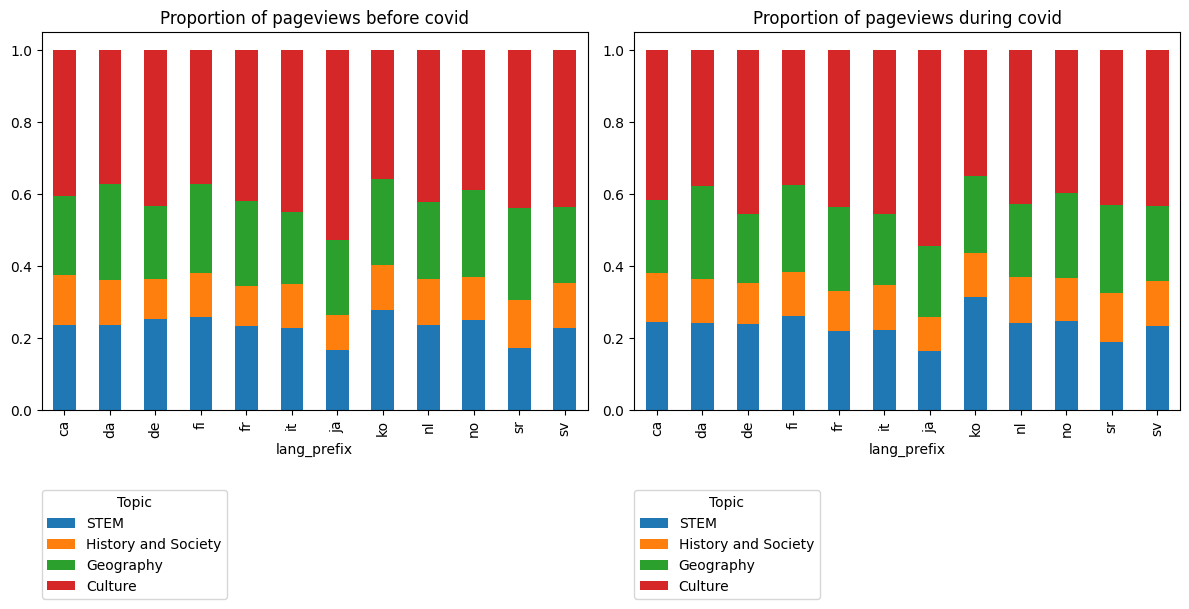

In [18]:
import matplotlib.pyplot as plt

# Assuming mapped_timeseries_df_bef and mapped_timeseries_df_aft are your DataFrames
# Adjust the figsize based on your preference
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# Plot the first bar plot
mapped_timeseries_df_bef.plot.bar(x='lang_prefix', stacked=True, title='Proportion of pageviews before covid', ax=axes[0])
axes[0].legend(title='Topic', loc=(0, -0.5))

# Plot the second bar plot
mapped_timeseries_df_aft.plot.bar(x='lang_prefix', stacked=True, title='Proportion of pageviews during covid', ax=axes[1])
axes[1].legend(title='Topic', loc=(0, -0.5))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [19]:
df_timeseries_aft['STEM.Biology']


0     0.011405
1     0.023914
2     0.020265
3     0.023392
4     0.011186
5     0.014365
6     0.016579
7     0.014989
8     0.004927
9     0.019783
10    0.013319
11    0.005526
Name: STEM.Biology, dtype: float64

In [20]:
df_timeseries_bef['STEM.Biology']

0     0.009456
1     0.018067
2     0.017481
3     0.017597
4     0.009377
5     0.012336
6     0.014141
7     0.012690
8     0.003895
9     0.014792
10    0.010785
11    0.004387
Name: STEM.Biology, dtype: float64

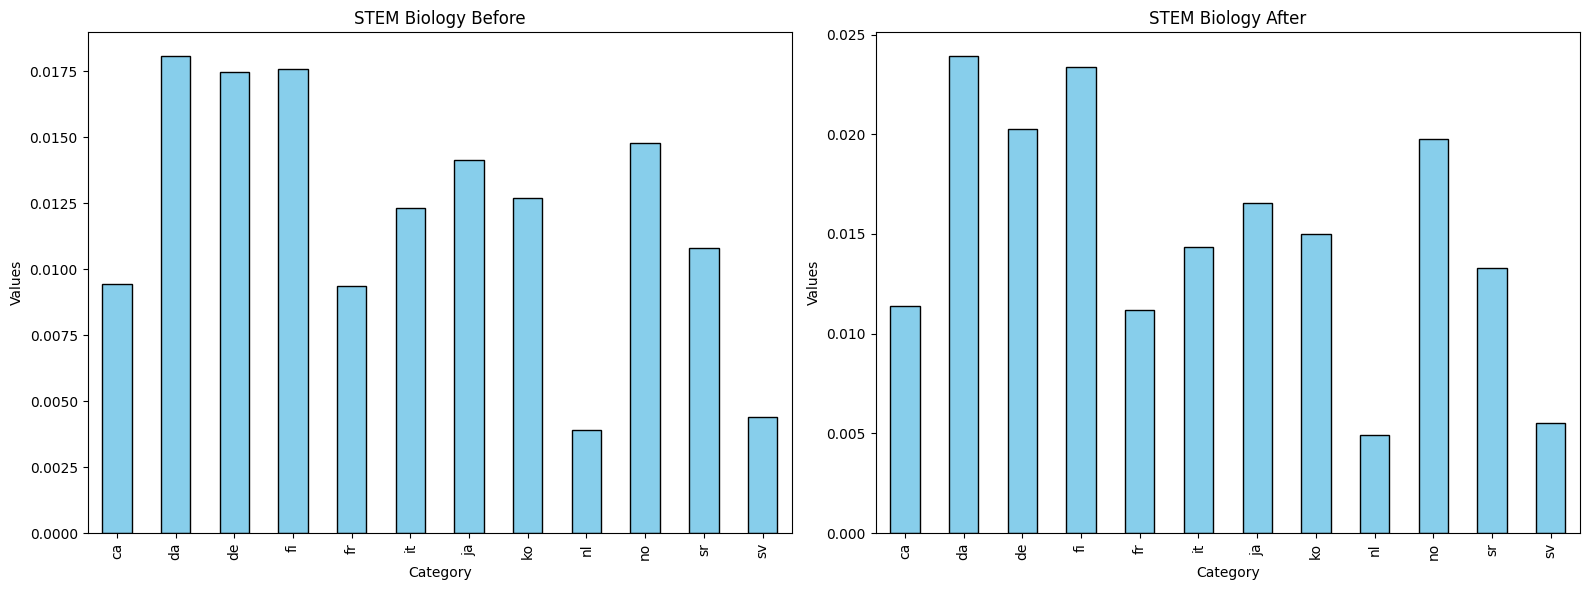

In [21]:
import matplotlib.pyplot as plt

# Assuming df_timeseries_bef and df_timeseries_aft are your DataFrames
df_bef = df_timeseries_bef.copy()
df_aft = df_timeseries_aft.copy()
# Set 'lang_prefix' as the index for both DataFrames

df_bef.set_index('lang_prefix', inplace=True)
df_aft.set_index('lang_prefix', inplace=True)

# Adjust the figsize based on your preference
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bar chart for df_timeseries_bef
df_bef['STEM.Biology'].plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('STEM Biology Before')

# Plot the bar chart for df_timeseries_aft
df_aft['STEM.Biology'].plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_title('STEM Biology After')

# Add titles and labels
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Values')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


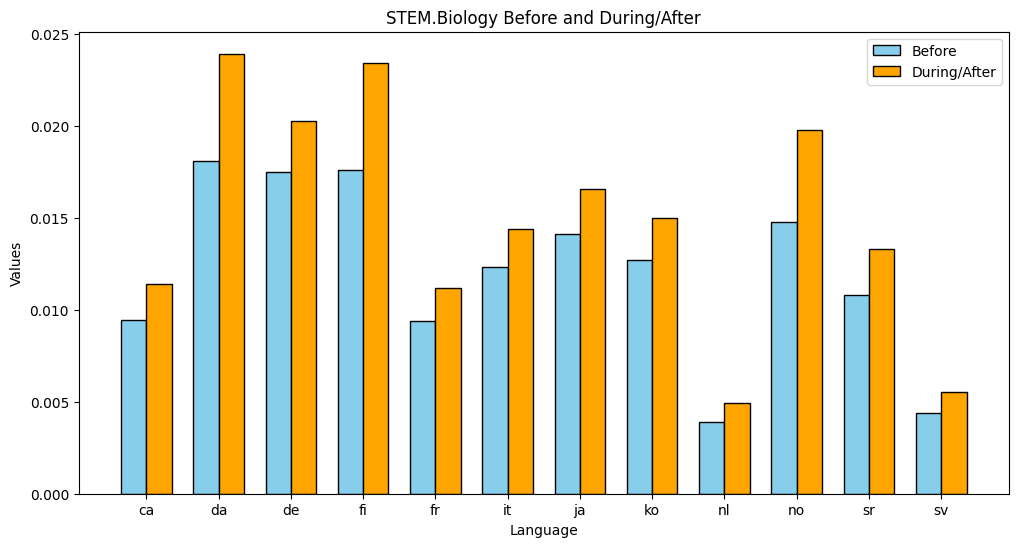

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_before_after(df_bef, df_aft, category):
    # Set 'lang_prefix' as the index for both DataFrames
    df_bef2 = df_bef.copy()
    df_aft2 = df_aft.copy()
    df_bef2.set_index('lang_prefix', inplace=True)
    df_aft2.set_index('lang_prefix', inplace=True)

    # Check if the category exists in both DataFrames
    if category not in df_bef2.columns or category not in df_aft2.columns:
        print(f"Category '{category}' not found in both DataFrames.")
        return

    # Adjust the figsize based on your preference
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set the bar width for better visualization
    bar_width = 0.35

    # Get the categories and their positions
    categories = df_bef2.index
    positions_bef = np.arange(len(categories))
    positions_aft = positions_bef + bar_width

    # Plot the bar chart for df_bef
    ax.bar(positions_bef, df_bef2[category], width=bar_width, color='skyblue', edgecolor='black', label='Before')

    # Plot the bar chart for df_aft
    ax.bar(positions_aft, df_aft2[category], width=bar_width, color='orange', edgecolor='black', label='During/After')

    # Add titles and labels
    ax.set_title(f'{category} Before and During/After')
    ax.set_xlabel('Language')
    ax.set_ylabel('Values')
    ax.set_xticks(positions_bef + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    # Show the plot
    plt.show()

# Example usage:
# Replace df_timeseries_bef and df_timeseries_aft with your actual DataFrames
plot_before_after(df_timeseries_bef.copy(), df_timeseries_aft.copy(), 'STEM.Biology')

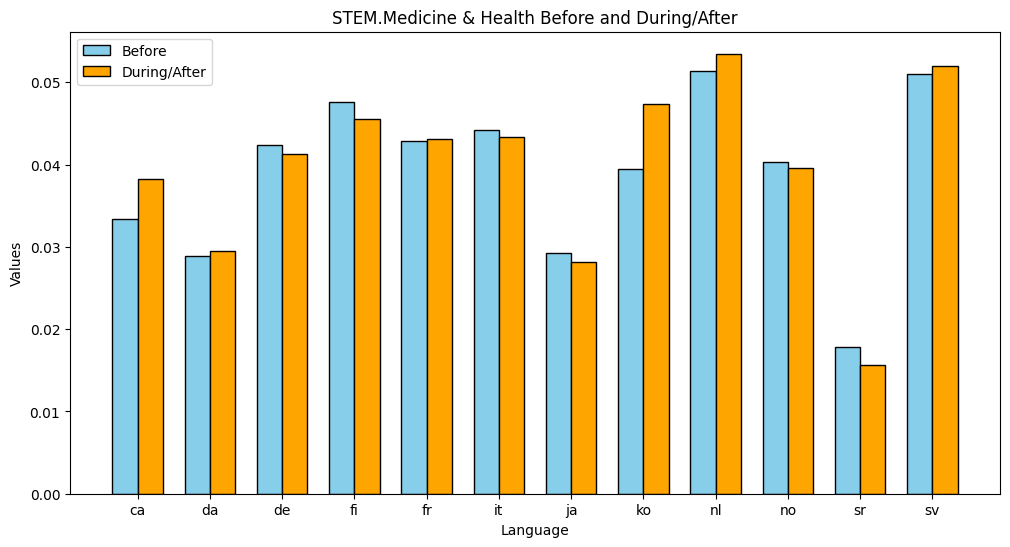

In [23]:
plot_before_after(df_timeseries_bef.copy(), df_timeseries_aft.copy(), 'STEM.Medicine & Health')

In [24]:
plot_before_after(df_timeseries_bef.copy(), df_timeseries_aft.copy(), 'ALL')


Category 'ALL' not found in both DataFrames.


In [25]:
df_timeseries_bef_raw = Data_before_covid[Data_before_covid.topic != 'ALL'].groupby(["language", "topic"])["pageviews"].mean().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries_bef_raw = df_timeseries_bef_raw.pivot(index='language', columns='topic', values='pageviews').reset_index()

df_timeseries_bef_raw['total_pageviews'] = df_timeseries_bef_raw.drop('language', axis=1).sum(axis=1)

df_timeseries_bef_raw['lang_prefix'] = df_timeseries_bef_raw['language'].str[:2]
df_timeseries_bef_raw = df_timeseries_bef_raw.drop('language', axis = 1)
df_timeseries_bef_raw = df_timeseries_bef_raw.groupby(['lang_prefix'], as_index=False).agg({
    **{topic: 'sum' for topic in df_timeseries_bef_raw.columns if topic not in ['lang_prefix']},
})
display(df_timeseries_bef_raw)

topic,lang_prefix,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,1.276307e+05,2.849721e+04,9362.333333,4464.378277,10299.892634,2.356944e+04,5376.727840,3028.551810,9.486196e+03,...,10223.836454,4845.000000,1277.988764,3584.801498,1.862070e+04,9917.414482,1.025024e+05,5210.559301,1.444903e+04,1.160476e+06
1,da,2.085974e+05,5.104176e+04,18741.922693,8433.405237,10544.144638,3.581775e+04,8421.270574,9009.347880,2.492020e+04,...,11319.517456,14675.110973,991.339152,6009.194514,2.708400e+04,13118.640898,1.536158e+05,5858.521197,2.068549e+04,1.935367e+06
2,de,5.891876e+06,1.548285e+06,572981.400996,387803.391034,282396.589041,9.122783e+05,230667.537983,400770.252802,1.309743e+06,...,275090.074720,886609.428394,27190.584060,210469.763387,1.342617e+06,376008.536737,5.910127e+06,163140.605230,1.019989e+06,6.165461e+07
3,fi,3.614491e+05,7.950651e+04,42514.085714,29111.983851,22488.437267,7.243377e+04,17631.027329,23544.954037,6.590935e+04,...,23941.124224,42413.652174,1420.388820,11370.833540,9.899867e+04,27754.011180,4.112988e+05,13811.772671,5.716413e+04,3.992011e+06
4,fr,5.632658e+06,1.440005e+06,383574.353674,330565.317559,206016.444583,1.166341e+06,259897.011208,321514.475716,1.102806e+06,...,205720.422167,404105.739726,22744.312578,148709.383562,8.279861e+05,257859.706102,3.559148e+06,128079.539228,6.474496e+05,4.967777e+07
5,it,4.385282e+06,9.777019e+05,250726.525189,215403.020151,141290.832494,9.514243e+05,213551.040302,290573.731738,1.218678e+06,...,127561.279597,286487.311083,16100.798489,89497.515113,6.679620e+05,191664.120907,2.396580e+06,94030.369018,3.602217e+05,3.921117e+07
6,ja,7.392785e+06,1.409898e+06,450855.358323,751363.114358,224787.182973,3.508921e+06,177023.167726,329506.186785,1.115012e+06,...,205394.265565,665664.937738,22971.919949,127165.893266,8.622085e+05,245008.123253,3.974404e+06,127376.444727,7.102503e+05,6.941464e+07
7,ko,4.054169e+05,7.888763e+04,36496.109834,48881.730524,27279.291188,7.011328e+04,12899.406130,11882.266922,4.809117e+04,...,17848.524904,34231.448276,4803.590038,27596.911877,7.748262e+04,37557.401022,4.077129e+05,14078.438059,9.443348e+04,4.528559e+06
8,nl,9.932969e+05,2.252890e+05,110302.208750,49454.085000,50556.590000,1.490774e+05,34040.705000,52604.597500,1.378980e+05,...,53239.001250,90706.262500,4656.143750,27953.437500,2.231963e+05,57306.276250,8.815009e+05,24979.698750,1.255227e+05,9.713399e+06
9,no,2.384417e+05,5.438860e+04,22082.554863,9636.300499,15924.598504,3.793679e+04,9552.061097,8253.912718,2.137018e+04,...,15396.124688,19347.710723,1473.829177,5814.149626,3.371817e+04,13458.264339,1.874487e+05,7680.460100,2.819539e+04,2.331748e+06


In [26]:
df_timeseries_aft_raw = Data_after_covid[Data_after_covid.topic != 'ALL'].groupby(["language", "topic"])["pageviews"].mean().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries_aft_raw = df_timeseries_aft_raw.pivot(index='language', columns='topic', values='pageviews').reset_index()

df_timeseries_aft_raw['total_pageviews'] = df_timeseries_aft_raw.drop('language', axis=1).sum(axis=1)

df_timeseries_aft_raw['lang_prefix'] = df_timeseries_aft_raw['language'].str[:2]
df_timeseries_aft_raw = df_timeseries_aft_raw.drop('language', axis = 1)
df_timeseries_aft_raw = df_timeseries_aft_raw.groupby(['lang_prefix'], as_index=False).agg({
    **{topic: 'sum' for topic in df_timeseries_aft_raw.columns if topic not in ['lang_prefix']},
})
display(df_timeseries_aft_raw)

topic,lang_prefix,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,1.199174e+05,2.966844e+04,10444.056338,5495.556338,10372.387324,2.533210e+04,6038.626761,4038.485915,1.415080e+04,...,10416.704225,5668.077465,1492.140845,4600.429577,2.392958e+04,11370.225352,1.204298e+05,4664.007042,1.585658e+04,1.225406e+06
1,da,1.981667e+05,4.715987e+04,18167.092199,8273.524823,10470.148936,3.331992e+04,8480.127660,9061.546099,2.800312e+04,...,9533.439716,13466.042553,1187.581560,5759.964539,2.603080e+04,12219.560284,1.527412e+05,5901.255319,1.899355e+04,1.836299e+06
2,de,6.172745e+06,1.645124e+06,595477.628571,493796.814286,267395.835714,9.837485e+05,257914.807143,451341.114286,1.477247e+06,...,254869.935714,832841.728571,27913.435714,214515.385714,1.345047e+06,353191.600000,6.025172e+06,181327.521429,1.067494e+06,6.330896e+07
3,fi,3.581599e+05,8.260653e+04,45479.594203,29104.202899,22022.739130,7.290483e+04,18799.173913,25126.231884,6.913878e+04,...,25401.644928,42174.021739,1518.536232,10930.347826,9.573183e+04,27605.681159,4.454169e+05,13042.340580,5.664269e+04,4.046382e+06
4,fr,6.455716e+06,1.679310e+06,418084.942857,405078.521429,214242.942857,1.340709e+06,314359.907143,403874.742857,1.383094e+06,...,197384.042857,407595.678571,21041.692857,151940.535714,9.044233e+05,248644.542857,3.758990e+06,145543.985714,6.564678e+05,5.530540e+07
5,it,5.127846e+06,1.154428e+06,262529.684564,291342.557047,153853.892617,1.206217e+06,302282.550336,392596.308725,1.629539e+06,...,146220.442953,292303.456376,14619.348993,104896.651007,7.748985e+05,218318.859060,2.785127e+06,112885.308725,4.434913e+05,4.595695e+07
6,ja,8.450956e+06,1.585739e+06,451775.935897,927084.666667,223136.064103,4.052311e+06,202396.121795,411353.326923,1.339690e+06,...,215745.839744,625272.044872,22815.891026,152157.314103,9.200967e+05,268600.025641,4.295115e+06,142632.955128,7.633384e+05,7.736277e+07
7,ko,3.989603e+05,8.274358e+04,39149.937500,62324.162500,28548.987500,7.708549e+04,15453.281250,11217.262500,4.665507e+04,...,21023.962500,32481.606250,4952.162500,35062.068750,1.021860e+05,51518.506250,5.067399e+05,16834.550000,1.131446e+05,4.773881e+06
8,nl,1.070587e+06,2.406265e+05,116900.265734,60007.251748,52111.468531,1.667952e+05,40119.496503,76032.608392,1.742534e+05,...,52583.958042,85195.615385,5108.475524,28602.776224,2.508220e+05,71783.041958,9.845347e+05,44706.818182,1.325847e+05,1.041848e+07
9,no,2.170260e+05,4.807739e+04,21696.829787,9384.255319,14430.269504,3.445511e+04,9146.709220,8072.234043,2.167882e+04,...,13056.127660,17987.602837,1408.255319,5254.531915,3.002228e+04,11209.744681,1.795263e+05,6376.404255,2.438572e+04,2.148084e+06


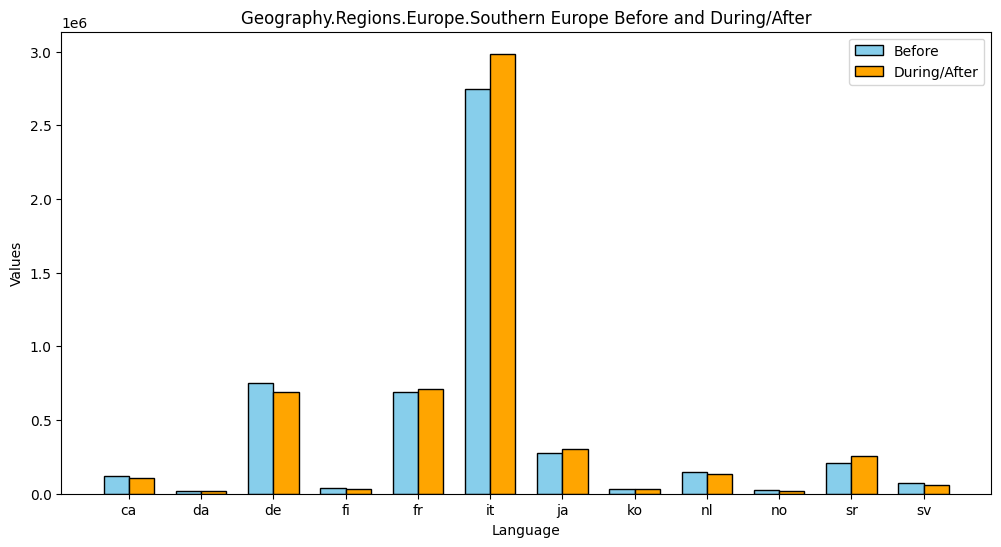

In [27]:
plot_before_after(df_timeseries_bef_raw.copy(), df_timeseries_aft_raw.copy(), 'Geography.Regions.Europe.Southern Europe')

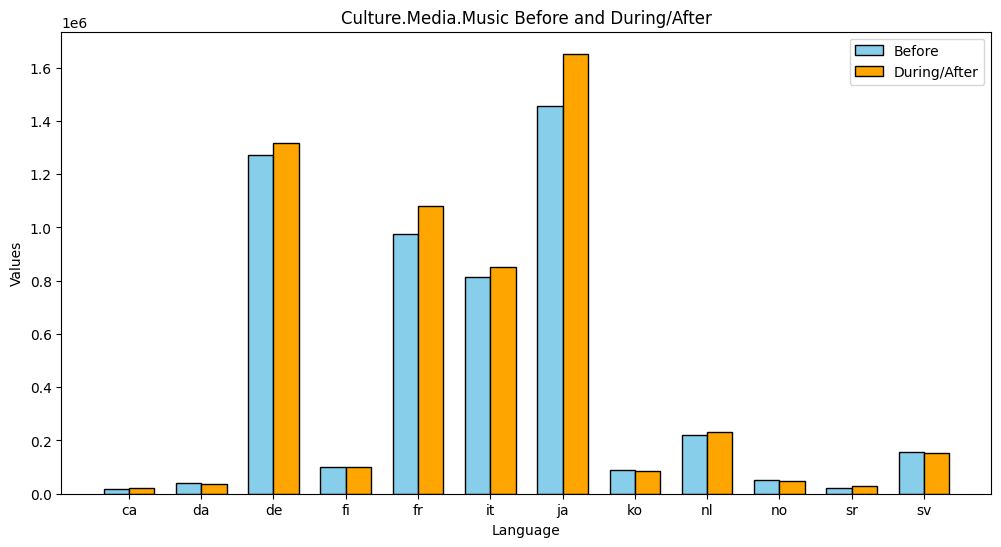

In [28]:
plot_before_after(df_timeseries_bef_raw.copy(), df_timeseries_aft_raw.copy(), 'Culture.Media.Music')

In [29]:
topic_mapping = {
    'STEM': ['STEM.Biology', 'STEM.Chemistry', 'STEM.Computing', 'STEM.Earth and environment',
             'STEM.Engineering', 'STEM.Libraries & Information', 'STEM.Mathematics',
             'STEM.Medicine & Health', 'STEM.Physics', 'STEM.STEM*', 'STEM.Space', 'STEM.Technology'],
    'History and Society': ['History and Society.Business and economics', 'History and Society.Education',
                            'History and Society.History', 'History and Society.Military and warfare',
                            'History and Society.Politics and government', 'History and Society.Society',
                            'History and Society.Transportation'],
    'Geography': ['Geography.Geographical', 'Geography.Regions.Africa.Africa*',
                  'Geography.Regions.Africa.Central Africa', 'Geography.Regions.Africa.Eastern Africa',
                  'Geography.Regions.Africa.Northern Africa', 'Geography.Regions.Africa.Southern Africa',
                  'Geography.Regions.Africa.Western Africa', 'Geography.Regions.Americas.Central America',
                  'Geography.Regions.Americas.North America', 'Geography.Regions.Americas.South America',
                  'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.Central Asia',
                  'Geography.Regions.Asia.East Asia', 'Geography.Regions.Asia.North Asia',
                  'Geography.Regions.Asia.South Asia', 'Geography.Regions.Asia.Southeast Asia',
                  'Geography.Regions.Asia.West Asia', 'Geography.Regions.Europe.Eastern Europe',
                  'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Northern Europe',
                  'Geography.Regions.Europe.Southern Europe', 'Geography.Regions.Europe.Western Europe',
                  'Geography.Regions.Oceania'],
    'Culture': ['Culture.Biography.Biography*', 'Culture.Biography.Women', 'Culture.Food and drink',
                'Culture.Internet culture', 'Culture.Linguistics', 'Culture.Literature', 'Culture.Media.Books',
                'Culture.Media.Entertainment', 'Culture.Media.Films', 'Culture.Media.Media*', 'Culture.Media.Music',
                'Culture.Media.Radio', 'Culture.Media.Software', 'Culture.Media.Television', 'Culture.Media.Video games',
                'Culture.Performing arts', 'Culture.Philosophy and religion', 'Culture.Sports',
                'Culture.Visual arts.Architecture', 'Culture.Visual arts.Comics and Anime', 'Culture.Visual arts.Fashion',
                'Culture.Visual arts.Visual arts*']
}

In [30]:
print(df_timeseries_bef_raw['Geography.Regions.Asia.East Asia'])
print(df_timeseries_aft_raw['Geography.Regions.Asia.East Asia'])

0     4.445230e+03
1     6.896678e+03
2     2.861017e+05
3     2.042912e+04
4     2.642245e+05
5     1.652284e+05
6     8.532360e+06
7     5.450540e+05
8     4.180102e+04
9     9.153724e+03
10    5.418096e+03
11    2.554373e+04
Name: Geography.Regions.Asia.East Asia, dtype: float64
0     5.522120e+03
1     7.198730e+03
2     3.045656e+05
3     2.228355e+04
4     3.226352e+05
5     2.286757e+05
6     9.589339e+06
7     5.450052e+05
8     4.477008e+04
9     9.247823e+03
10    7.545273e+03
11    2.555409e+04
Name: Geography.Regions.Asia.East Asia, dtype: float64
